<a href="https://colab.research.google.com/github/jdanifalcon/scrapeo_SMN/blob/main/smn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descargar la base de datos del Sistema Metereologico Nacional



![cg.jpg](https://raw.githubusercontent.com/jdanifalcon/FundamentosIA/main/logo/logo_cg.jpg)

---
#### **Tallerista:** Jessica Daniela Ocaña Falcón
#### **Sede:** Mérida  
#### **Orientación:** Geointeligencia Computacional
---

Este código esta basado en el código del Dr. Sergio Ivvan Valdez Peña, les dejo el link para que lo puedan revisar: https://sites.google.com/centrogeo.edu.mx/tutoriales-geocomputacion/contacto

In [9]:
# Cargar las librerías necesarias
library(rvest)    # Nos ayuda con el scrapping del HTML
library(stringr)   # Nos ayuda a manipular cadenas de texto

In [12]:
# Definir acrónimos de estados y la URL base
estados <- c("ags", "bc", "bcs", "camp", "coah", "col", "chis", "chih",
              "cdmx", "dgo", "gto","gro", "hgo", "jal", "mex", "mich", "mor",
              "nay", "nl", "oax", "pue", "qro","qroo", "slp", "sin", "son", "tab",
              "tamps", "tlax", "ver", "yuc", "zac")

url_base <- "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/catalogo/cat_"

In [13]:
# Crear una función para obtener la tabla de un estado
obtener_datos_estado <- function(estado) {
  url <- paste0(url_base, estado, ".html")
  html <- read_html(url)
  tabla <- html_nodes(html, "table") %>% html_table(fill = TRUE)
  df <- as.data.frame(tabla[[1]][3:nrow(tabla[[1]]), ])
  return(df)
}

In [14]:
# Ejemplo: Obtener datos del estado de Tabasco (posición 27 en la lista)
estado_tabasco <- obtener_datos_estado(estados[27])

# Imprimir los primeros registros del estado de Tabasco
head(estado_tabasco)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,27001,Balancan De Dominguez (SMN),Balancán,Suspendida,Diario,Mensual,Ext-hist,,,,
2,27002,Benito Juarez,Centla,Operando,Diario,Mensual,Ext-hist,,,,
3,27003,Blasillo,Huimanguillo,Operando,Diario,Mensual,Ext-hist,,1971-2000,1981-2010,1991-2020
4,27004,Boca Del Cerro,Tenosique,Operando,Diario,Mensual,Ext-hist,1961-1990,1971-2000,1981-2010,1991-2020
5,27006,Buenavista,Balancán,Operando,Diario,Mensual,Ext-hist,,1971-2000,1981-2010,1991-2020
6,27007,Centro Experimental W-75,Cárdenas,Operando,Diario,Mensual,Ext-hist,1961-1990,,1981-2010,1991-2020


In [5]:
# Ejemplo: Obtener datos del estado de Chiapas (posición 07 en la lista)
estado_chiapas <- obtener_datos_estado(estados[07])

# Imprimir los primeros registros del estado de Chiapas
head(estado_chiapas)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,7001,Abasolo Chiapas (CFE),Ocosingo,Suspendida,Diario,Mensual,Ext-hist,,1971-2000,1981-2010,
2,7002,Abelardo L. Rodríguez,Comitán De Domínguez,Suspendida,Diario,Mensual,Ext-hist,1961-1990,1971-2000,1981-2010,1991-2020
3,7003,Acala,Acala,Operando,Diario,Mensual,Ext-hist,1961-1990,1971-2000,1981-2010,1991-2020
4,7004,Agua Azul,Ocosingo,Suspendida,Diario,Mensual,Ext-hist,,,,
5,7005,Almandro (CFE),Huitiupán,Suspendida,Diario,Mensual,Ext-hist,1961-1990,,,
6,7006,Altamirano (SMN),Altamirano,Operando,Diario,Mensual,Ext-hist,1961-1990,1971-2000,1981-2010,1991-2020


In [15]:
procesar_estados <- function(estado_indices) {
  # Inicializar DataFrame vacío
  df <- NULL

  # Procesar cada estado según su índice en la lista de `estados`
  for (estado_idx in estado_indices) {
    # Obtener el acrónimo del estado
    estado <- estados[estado_idx]

    # Crear una carpeta para cada estado dentro de la carpeta destino
    path_estado <- paste0("destino/", estado)
    if (!file.exists(path_estado)) {
      dir.create(path_estado, recursive = TRUE)
    }

    # Construir la URL completa
    url_completa <- paste0(url_base, estado, ".html")

    # Obtener los datos de la tabla HTML
    df_estado <- obtener_datos_estado(estado)

    # Imprimir los primeros registros del estado
    head(df_estado)

    # Recorrer cada estación del estado para descargar el archivo
    for (i in 1:nrow(df_estado)) {
      # Asegurar que el número de estación tenga 5 dígitos, agregando ceros al inicio si es necesario
      num_estacion <- sprintf("%05d", as.numeric(df_estado[i, "X1"]))

      # Construir la URL para la estación específica con el formato correcto
      urldata <- paste0("https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/",
                        estado, "/mes", num_estacion, ".txt")

      # Definir el archivo de destino en la carpeta del estado
      destfile <- paste0(path_estado, "/mes", num_estacion, ".txt")

      # Descargar el archivo
      tryCatch({
        download.file(urldata, destfile)
        print(paste("Descargado:", urldata))
      }, error = function(e) {
        # Si hay un error, imprimir un mensaje y continuar
        print(paste("Error en la descarga de:", urldata))
      })

      # Esperar un tiempo aleatorio entre descargas para no ser bloqueado
      Sys.sleep(5 * runif(1))
    }
  }

  # Devolver el DataFrame procesado
  return(df)
}

In [16]:
# Llamar a la función para los estados de Chiapas (7) y Tabasco (27)
#df_combinado <- procesar_estados(c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
#                                    11, 12, 13, 14, 15, 16, 17, 18,
#                                    19, 20, 21, 22, 23, 24, 25, 26, 27,
#                                    28, 29, 30, 31, 32))

#df_combinado <- procesar_estados(c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

df_combinado <- procesar_estados(c(27))

[1] "Descargado: https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/tab/mes27001.txt"
[1] "Descargado: https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/tab/mes27002.txt"
[1] "Descargado: https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/tab/mes27003.txt"
[1] "Descargado: https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/tab/mes27004.txt"
[1] "Descargado: https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/tab/mes27006.txt"
[1] "Descargado: https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/tab/mes27007.txt"
[1] "Descargado: https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/tab/mes27008.txt"
[1] "Descargado: https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/tab/mes27009.txt"
[1] "Descargado: https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/tab/mes270

In [8]:
# Define la ruta de la carpeta que quieres comprimir
ruta_carpeta <- "/content/destino"  # Reemplaza con la ruta de tu carpeta

# Comprimir la carpeta en un archivo ZIP
system(paste("zip -r", "destino.zip", ruta_carpeta))

# Descargar el archivo ZIP a tu computadora
file.rename("destino.zip", "/content/destino.zip")
#file.download("/content/archivos_descargados.zip")

[1] TRUE

In [17]:
procesar_estado <- function(estado_idx) {

  # Definir los nombres de los datos meteorológicos a extraer
  nomdatos <- c("LLUVIA MÁXIMA 24 H.", "LLUVIA TOTAL MENSUAL", "EVAPORACIÓN MENSUAL",
                "TEMPERATURA MÁXIMA PROMEDIO", "TEMPERATURA MÁXIMA EXTREMA",
                "TEMPERATURA MÍNIMA PROMEDIO", "TEMPERATURA MÍNIMA EXTREMA",
                "TEMPERATURA MEDIA MENSUAL")

  # Seleccionamos el estado con el índice proporcionado
  edo <- estado[estado_idx]

  # Definir la ruta de la carpeta destino para el estado
  dest <- paste0("./destino/", edo)

  # Obtener la lista de archivos en la carpeta del estado
  archivos <- dir(dest)

  # Inicializamos el data.frame totalDB que almacenará todos los datos
  totalDB <- NULL

  # Función auxiliar para encontrar índices de campos específicos en el archivo de datos
  nomIndex <- function(dat, nom) {
    idi <- which(dat == nom)
    if (length(idi) > 0) {
      fid <- which(substring(dat[idi:length(dat)], 1, 4) == "DESV")[1] - 1
    } else {
      idi <- fid <- 0
    }
    return(c(idi, idi + fid))
  }

  # Función auxiliar para extraer los años mínimos y máximos para cada campo
  yrComputation <- function(dat, nom) {
    idat <- nomIndex(dat, nom)
    if (idat[1] > 0) {
      an <- as.integer(substr(dat[(idat[1] + 2):(idat[2] - 4)], 1, 4))
    } else {
      an <- numeric(0)
    }
    return(an)
  }

  # Iteramos sobre cada archivo en la carpeta del estado
  for (darch in archivos) {
    tryCatch({
      # Extraer el número de estación del nombre del archivo
      numest <- str_sub(darch, start = 4, end = -5)

      # Leer las líneas del archivo y eliminar espacios en blanco
      datos <- readLines(paste0(dest, '/', darch))
      datos <- trimws(datos, which = 'both')

      # Extraemos los años mínimos y máximos para cada campo
      MinMaxAnios <- sapply(nomdatos, FUN = function(nom, dat) {
        years <- yrComputation(dat, nom)
        if (length(years) > 0) {
          return(c(min(years), max(years)))
        } else {
          return(c(NA, NA))
        }
      }, datos)

      # Filtramos los valores NA en MinMaxAnios
      anios_min <- MinMaxAnios[1, !is.na(MinMaxAnios[1, ])]
      anios_max <- MinMaxAnios[2, !is.na(MinMaxAnios[2, ])]

      # Verificamos si existen años válidos
      if (length(anios_min) == 0 || length(anios_max) == 0) {
        warning(paste("No se encontraron años válidos en el archivo:", darch))
        next # Omite este archivo y pasa al siguiente
      }

      # Generar un rango de años para la extracción de datos
      tanios <- min(anios_min):max(anios_max)

      # Definir los nombres de los meses
      mes <- format(ISOdatetime(2000, 1:12, 1, 0, 0, 0), "%b")

      # Crear un DataFrame vacío para almacenar los datos de este archivo
      df <- data.frame(NoEst = numest, Situacion = unlist(strsplit(datos[15], ' '))[3],
                       Year = rep(tanios, each = 12), Month = mes,
                       Lat = as.numeric(unlist(strsplit(datos[17], ' '))[5]),
                       Lon = as.numeric(unlist(strsplit(datos[18], ' '))[4]),
                       Alt = as.numeric(unlist(strsplit(datos[19], ' '))[5]),
                       matrix(NA, nrow = length(tanios) * 12, ncol = length(nomdatos)))

      # Nombrar las columnas del DataFrame creado
      names(df) <- c('NoSta', 'Operational', 'Year', 'Month', 'Lat', 'Lon', 'Alt', nomdatos)

      # Llenamos los datos para cada campo meteorológico
      df[, nomdatos] <- sapply(nomdatos, FUN = function(nom, data, dframe) {
        idat <- nomIndex(data, nom)
        rdf <- data.frame(dframe$Year, dframe$Month, NA)
        if (idat[1] > 0) {
          dat <- sapply(data[(idat[1] + 2):(idat[2] - 4)], FUN = function(x) {
            matrix(as.numeric(unlist(strsplit(x, '\t'))), nrow = 1)
          })
          aniosCampo <- data.frame(Year = rep(dat[1, ], each = 12), Month = mes)
          datosCampo <- matrix(dat[2:13, ], ncol = 1)
          indices <- dframe$Year %in% aniosCampo$Year
          names(rdf) <- c("Year", "Month", nom)
          rdf[indices, nom] <- datosCampo
        }
        return(rdf[, 3])
      }, datos, df)

      # Agregamos el DataFrame creado a la base de datos totalDB
      totalDB <- rbind(totalDB, df)

    }, error = function(e) {
      # En caso de error, imprime un mensaje y continúa con el siguiente archivo
      message(paste("Error al procesar el archivo:", darch, "\n", e))
    })
  }

  # Guardamos la base de datos total en un archivo CSV si tiene datos
  if (!is.null(totalDB)) {
    write.csv(totalDB, paste0("./csv/clima_", edo, ".csv"), row.names = FALSE)
  } else {
    message(paste("No se generó ningún dato para el estado:", edo))
  }
}

In [19]:
# Lista de nombres de estados y campos a extraer
#estado <- c("ags", "bc", "bcs", "camp", "coah", "col", "chis", "chih", "df", "dgo", "gto", "gro", "hgo", "jal", "mex",
           # "mich", "mor", "nay", "nl", "oax", "pue", "qro", "qroo", "slp", "sin", "son", "tab", "tamps", "tlax", "ver", "yuc", "zac")

estado <- c("chis", "tab")
# Llamamos a la función para todos los estados
for (i in 1:length(estado)) {
  procesar_estado(i)
}

In [20]:
# Define la ruta de la carpeta que quieres comprimir
ruta_carpeta <- "/content/csv"  # Reemplaza con la ruta de tu carpeta

# Comprimir la carpeta en un archivo ZIP
system(paste("zip -r", "csv.zip", ruta_carpeta))

# Descargar el archivo ZIP a tu computadora
file.rename("csv.zip", "/content/csv.zip")

[1] TRUE

In [80]:
library(ggplot2)

In [76]:
#Leemos la base de datos de Tabasco
data=read.csv("/content/csv/clima_tab.csv")
#Podemos ver los nombres de las bases de datos
names(data)

[1] "NoSta"                       "Operational"                
 [3] "Year"                        "Month"                      
 [5] "Lat"                         "Lon"                        
 [7] "Alt"                         "LLUVIA.MÁXIMA.24.H."        
 [9] "LLUVIA.TOTAL.MENSUAL"        "EVAPORACIÓN.MENSUAL"        
[11] "TEMPERATURA.MÁXIMA.PROMEDIO" "TEMPERATURA.MÁXIMA.EXTREMA" 
[13] "TEMPERATURA.MÍNIMA.PROMEDIO" "TEMPERATURA.MÍNIMA.EXTREMA" 
[15] "TEMPERATURA.MEDIA.MENSUAL"

In [69]:
head(data)

,NoSta,Operational,Year,Month,Lat,Lon,Alt,LLUVIA.MÁXIMA.24.H.,LLUVIA.TOTAL.MENSUAL,EVAPORACIÓN.MENSUAL,TEMPERATURA.MÁXIMA.PROMEDIO,TEMPERATURA.MÁXIMA.EXTREMA,TEMPERATURA.MÍNIMA.PROMEDIO,TEMPERATURA.MÍNIMA.EXTREMA,TEMPERATURA.MEDIA.MENSUAL
,<int>,<chr>,<int>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27001,SUSPENDIDA,1943,Jan,17.81,-91.53667,18,NA,NA,NA,NA,NA,NA,NA,NA
2,27001,SUSPENDIDA,1943,Feb,17.81,-91.53667,18,NA,NA,NA,NA,NA,NA,NA,NA
3,27001,SUSPENDIDA,1943,Mar,17.81,-91.53667,18,NA,NA,NA,NA,NA,NA,NA,NA
4,27001,SUSPENDIDA,1943,Apr,17.81,-91.53667,18,NA,NA,NA,NA,NA,NA,NA,NA
5,27001,SUSPENDIDA,1943,May,17.81,-91.53667,18,NA,NA,NA,NA,NA,NA,NA,NA
6,27001,SUSPENDIDA,1943,Jun,17.81,-91.53667,18,NA,NA,NA,NA,NA,NA,NA,NA


Warning message:
“Removed 16614 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


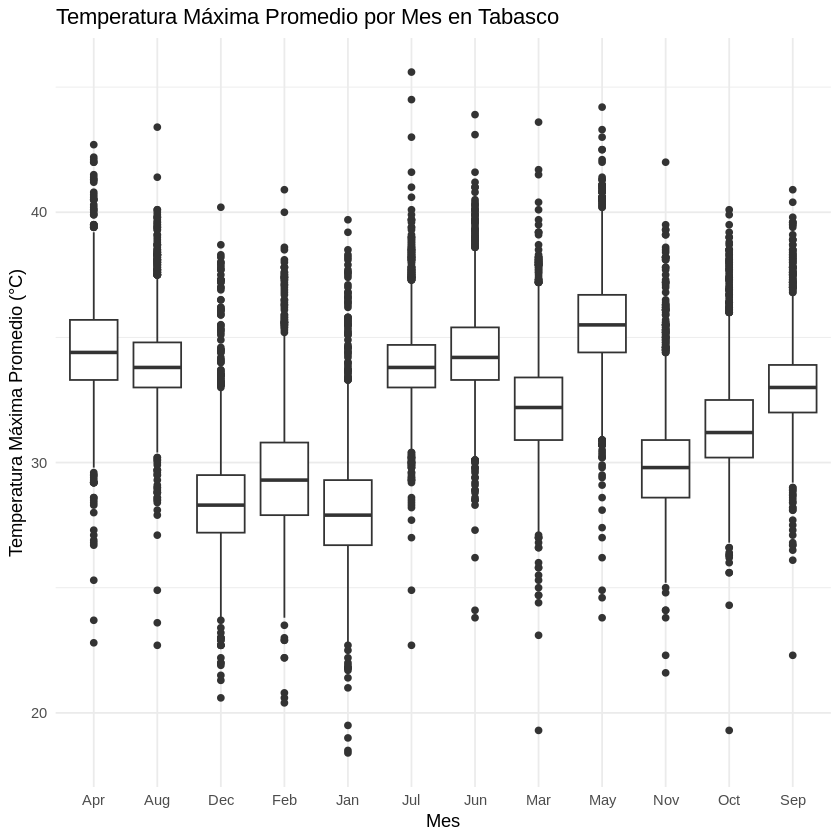

In [29]:
# Convertimos el mes a factor para que ggplot lo trate como variable categórica
data$Month <- factor(data$Month)

# Graficar la temperatura máxima promedio por mes
ggplot(data, aes(x = Month, y = TEMPERATURA.MÁXIMA.PROMEDIO)) +
  geom_boxplot() +
  labs(title = "Temperatura Máxima Promedio por Mes en Tabasco",
       x = "Mes",
       y = "Temperatura Máxima Promedio (°C)") +
  theme_minimal()

Warning message:
“Removed 33094 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


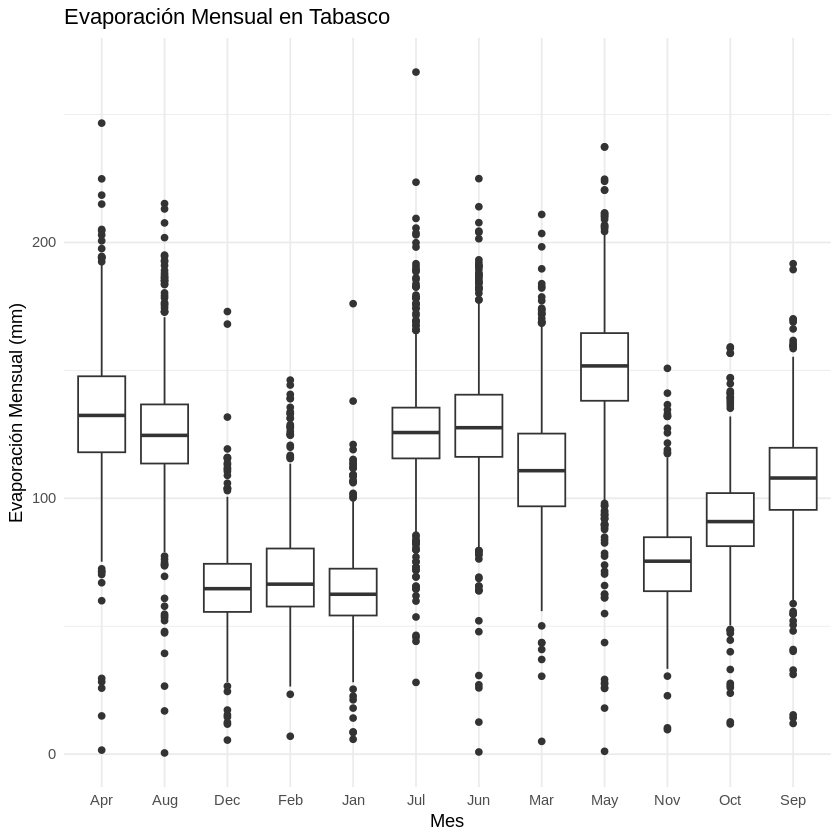

In [30]:
# Convertimos el mes a factor para que ggplot lo trate como variable categórica
data$Month <- factor(data$Month)

# Graficar la temperatura máxima promedio por mes
ggplot(data, aes(x = Month, y = EVAPORACIÓN.MENSUAL)) +
  geom_boxplot() +
  labs(title = "Evaporación Mensual en Tabasco",
       x = "Mes",
       y = "Evaporación Mensual (mm)") +
  theme_minimal()

Warning message:
“Removed 33094 rows containing non-finite outside the scale range
(`stat_bin()`).”


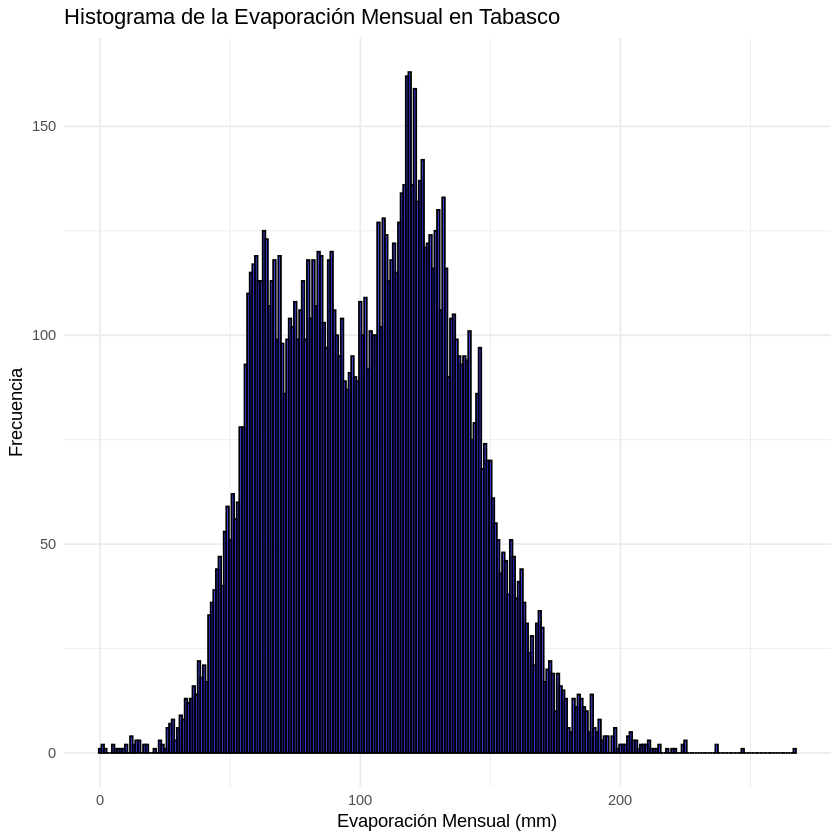

In [43]:
# Crear un histograma de la temperatura media mensual
ggplot(data, aes(x = EVAPORACIÓN.MENSUAL)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histograma de la Evaporación Mensual en Tabasco",
       x = "Evaporación Mensual (mm)",
       y = "Frecuencia") +
  theme_minimal()

Warning message:
“Removed 16614 rows containing non-finite outside the scale range
(`stat_bin()`).”


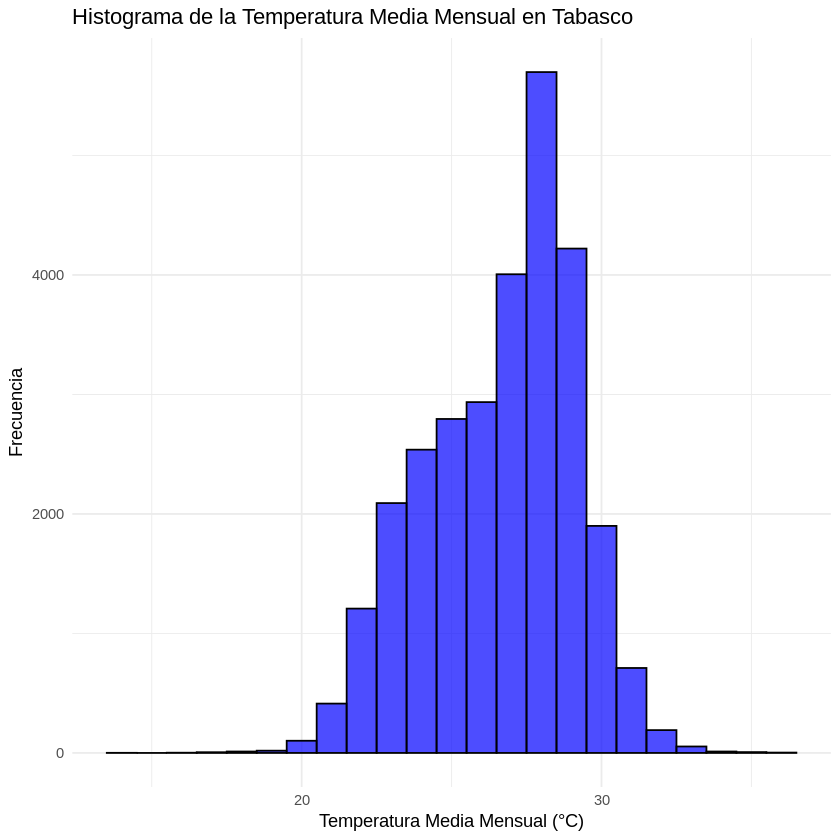

In [42]:
# Crear un histograma de la temperatura media mensual
ggplot(data, aes(x = TEMPERATURA.MEDIA.MENSUAL)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histograma de la Temperatura Media Mensual en Tabasco",
       x = "Temperatura Media Mensual (°C)",
       y = "Frecuencia") +
  theme_minimal()

In [77]:
# Convertir el mes a un formato que R pueda entender
data$Month <- match(data$Month, month.abb)  # Esto convierte "Jan" en 1, "Feb" en 2, etc.

# Crear una columna de fecha
data$date <- as.Date(paste(data$Year, data$Month, "01", sep = "-"), format = "%Y-%m-%d")

# Verificar la estructura de los datos
str(data)


'data.frame':	45540 obs. of  16 variables:
 $ NoSta                      : int  27001 27001 27001 27001 27001 27001 27001 27001 27001 27001 ...
 $ Operational                : chr  "SUSPENDIDA" "SUSPENDIDA" "SUSPENDIDA" "SUSPENDIDA" ...
 $ Year                       : int  1943 1943 1943 1943 1943 1943 1943 1943 1943 1943 ...
 $ Month                      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Lat                        : num  17.8 17.8 17.8 17.8 17.8 ...
 $ Lon                        : num  -91.5 -91.5 -91.5 -91.5 -91.5 ...
 $ Alt                        : int  18 18 18 18 18 18 18 18 18 18 ...
 $ LLUVIA.MÁXIMA.24.H.        : num  NA NA NA NA NA NA NA 32.6 29.5 90.9 ...
 $ LLUVIA.TOTAL.MENSUAL       : num  NA NA NA NA NA ...
 $ EVAPORACIÓN.MENSUAL        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ TEMPERATURA.MÁXIMA.PROMEDIO: num  NA NA NA NA NA NA NA NA NA NA ...
 $ TEMPERATURA.MÁXIMA.EXTREMA : num  NA NA NA NA NA NA NA NA NA NA ...
 $ TEMPERATURA.MÍNIMA.PROMEDIO: num  NA NA NA NA NA NA N

Warning message:
“Removed 63 rows containing missing values or values outside the scale range
(`geom_line()`).”


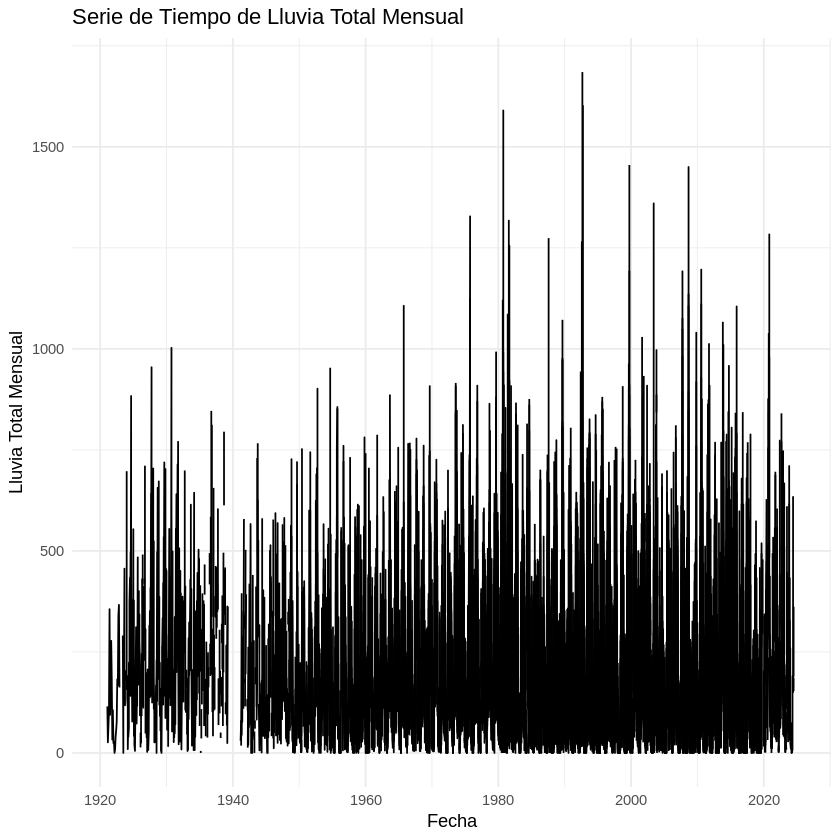

In [71]:
# Graficar la serie de tiempo para el periodo completo
p <- ggplot(data, aes(x = date, y = LLUVIA.TOTAL.MENSUAL)) +
  geom_line() +
  labs(title = "Serie de Tiempo de Lluvia Total Mensual",
       x = "Fecha",
       y = "Lluvia Total Mensual") +
  theme_minimal()

# Mostrar el gráfico
print(p)


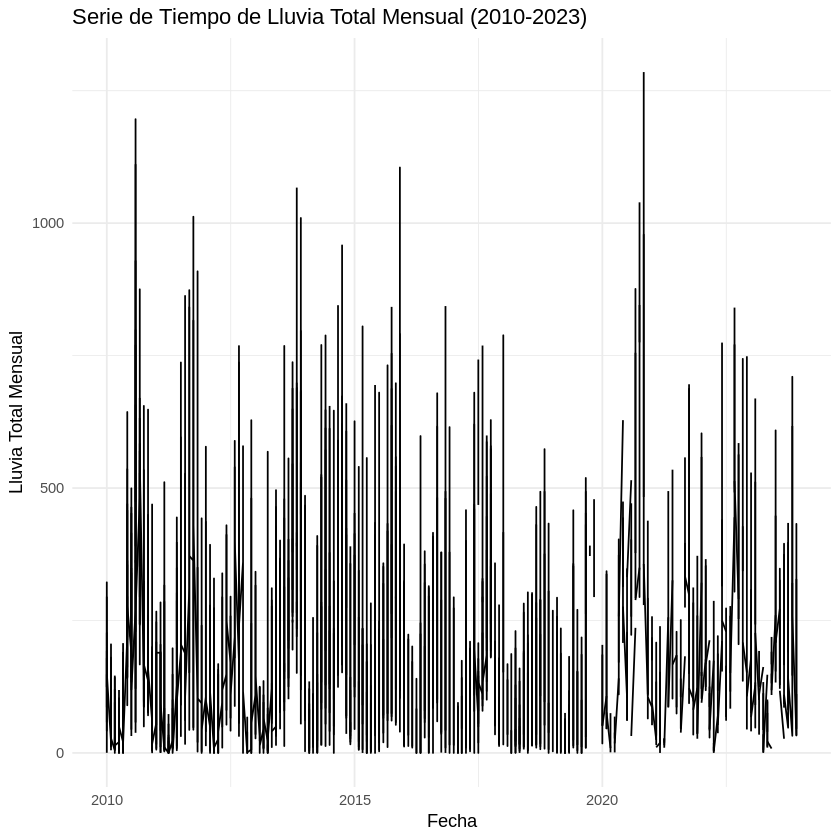

In [72]:
# Filtrar las fechas deseadas
indx <- which(data$date >= as.Date("2010-01-01") & data$date <= as.Date("2023-12-31"))
p_sub <- ggplot(data[indx, ], aes(x = date, y = LLUVIA.TOTAL.MENSUAL)) +
  geom_line() +
  labs(title = "Serie de Tiempo de Lluvia Total Mensual (2010-2023)",
       x = "Fecha",
       y = "Lluvia Total Mensual") +
  theme_minimal()

# Mostrar el gráfico
print(p_sub)


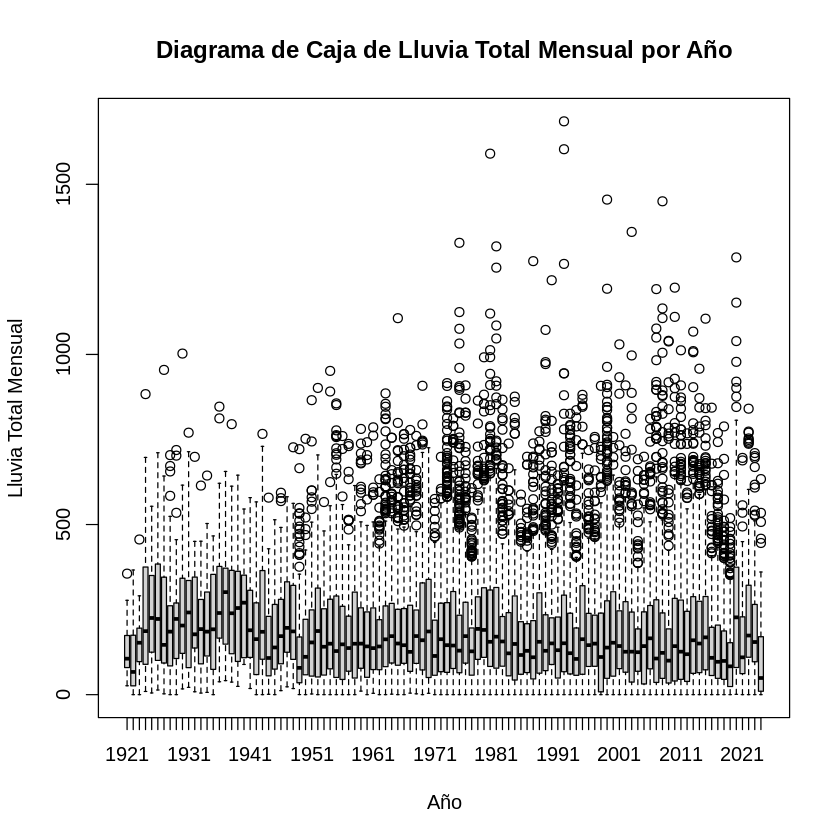

In [74]:
# Diagrama de caja por año
boxplot(data$LLUVIA.TOTAL.MENSUAL ~ data$Year,
        main = "Diagrama de Caja de Lluvia Total Mensual por Año",
        xlab = "Año",
        ylab = "Lluvia Total Mensual")


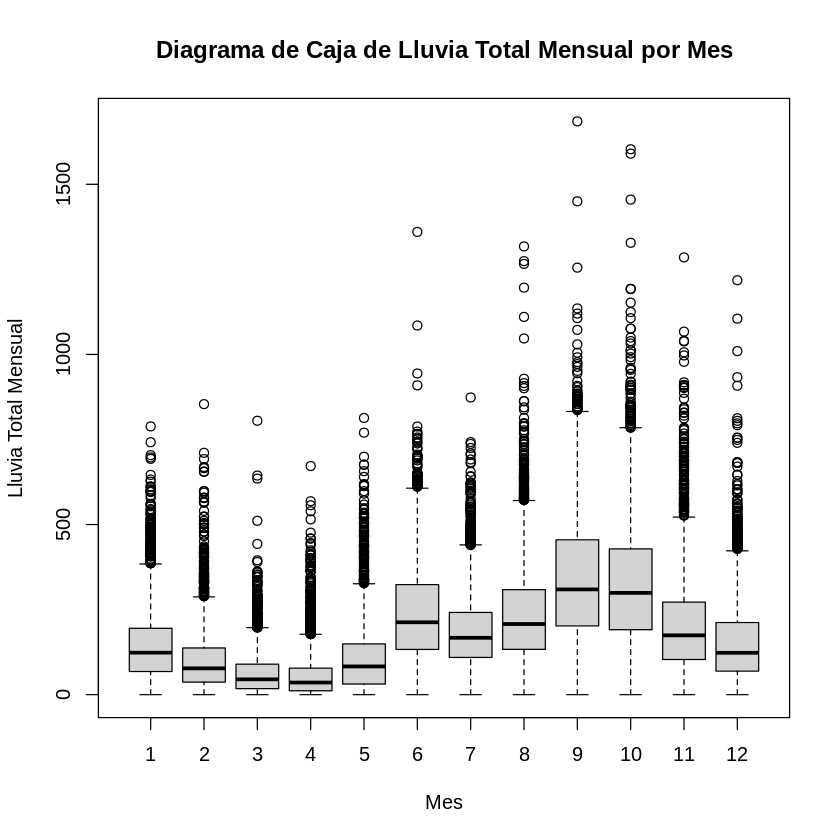

In [75]:
# Diagrama de caja por mes
boxplot(data$LLUVIA.TOTAL.MENSUAL ~ data$Month,
        main = "Diagrama de Caja de Lluvia Total Mensual por Mes",
        xlab = "Mes",
        ylab = "Lluvia Total Mensual")

In [78]:
# Cargar librerías necesarias
library(dplyr)
library(tidyr)  # Para la función pivot_longer

In [81]:
# Calcular la media y la desviación estándar de la lluvia total mensual por mes
estadisticas <- data %>%
  group_by(Month) %>%
  summarise(
    mu = mean(LLUVIA.TOTAL.MENSUAL, na.rm = TRUE),
    sigma = sd(LLUVIA.TOTAL.MENSUAL, na.rm = TRUE)
  )

# Ver las estadísticas calculadas
print(estadisticas)


# A tibble: 12 × 3
   Month    mu sigma
   <int> <dbl> <dbl>
 1     1 146.  108. 
 2     2 101.   91.8
 3     3  63.4  65.0
 4     4  58.1  70.8
 5     5 108.  104. 
 6     6 240.  145. 
 7     7 188.  113. 
 8     8 238.  150. 
 9     9 341.  187. 
10    10 329.  189. 
11    11 207.  150. 
12    12 158.  127. 


In [82]:
# Transformar los datos a formato largo
df_long <- estadisticas %>%
  pivot_longer(cols = c(mu, sigma), names_to = "variable", values_to = "value")

# Ver el dataframe transformado
print(df_long)


# A tibble: 24 × 3
   Month variable value
   <int> <chr>    <dbl>
 1     1 mu       146. 
 2     1 sigma    108. 
 3     2 mu       101. 
 4     2 sigma     91.8
 5     3 mu        63.4
 6     3 sigma     65.0
 7     4 mu        58.1
 8     4 sigma     70.8
 9     5 mu       108. 
10     5 sigma    104. 
# ℹ 14 more rows


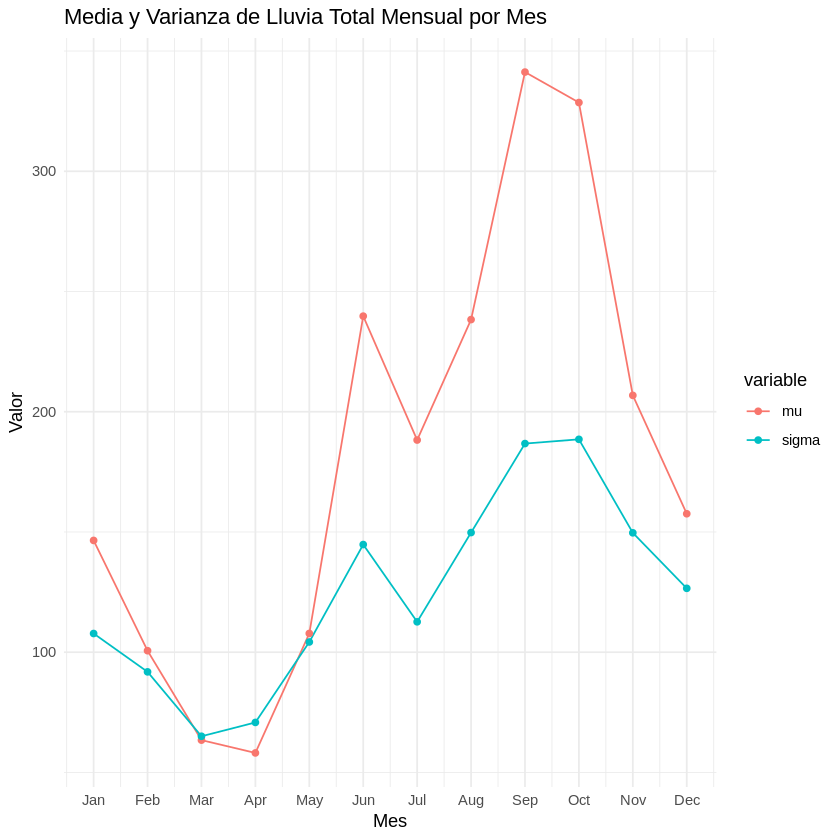

In [83]:
# Graficar la media y la varianza
p <- ggplot(df_long, aes(x = Month, y = value, colour = variable)) +
  geom_line() +
  geom_point() +
  labs(title = "Media y Varianza de Lluvia Total Mensual por Mes",
       x = "Mes",
       y = "Valor") +
  scale_x_continuous(breaks = 1:12, labels = month.abb) +  # Etiquetas de meses
  theme_minimal()

# Mostrar el gráfico
print(p)


In [89]:
# Instalar y cargar la librería forecast si no la tienes
install.packages("forecast")  # Descomentar si no está instalado
library(forecast)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



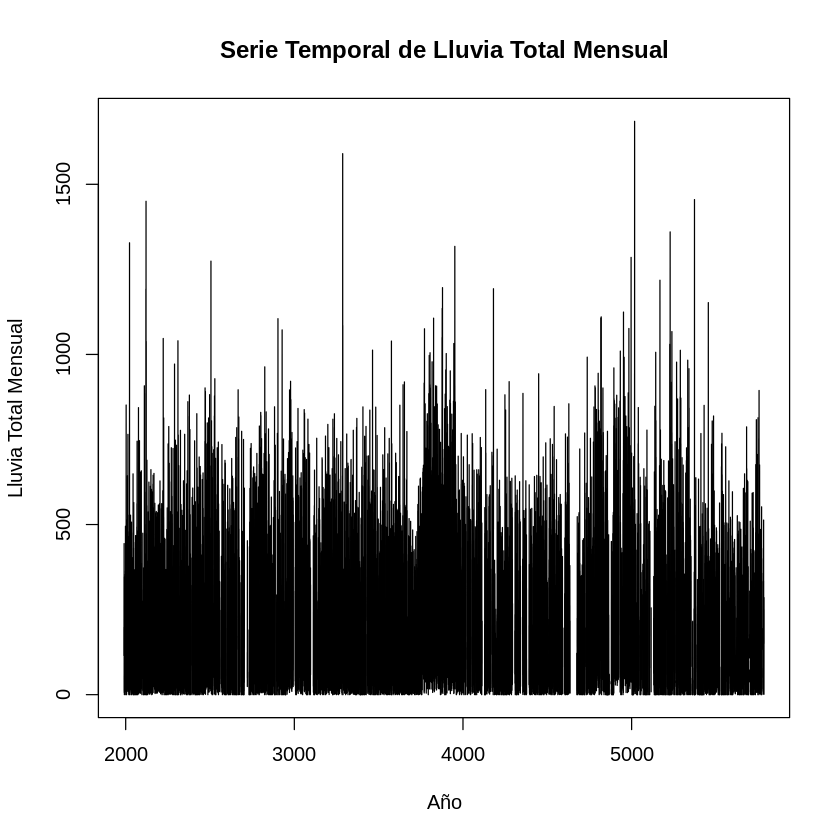

In [90]:
# Crear una serie temporal a partir de los datos de lluvia mensual
x <- ts(data$LLUVIA.TOTAL.MENSUAL, start = c(1990, 1), frequency = 12)

# Ver la serie temporal
plot(x, main = "Serie Temporal de Lluvia Total Mensual", ylab = "Lluvia Total Mensual", xlab = "Año")


In [93]:
# Install and load imputeTS package if needed
if (!require("imputeTS")) install.packages("imputeTS")
library(imputeTS)

Loading required package: imputeTS

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘imputeTS’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘markdown’, ‘png’, ‘jpeg’, ‘gridtext’, ‘ggtext’, ‘stinepack’




In [102]:
# Impute missing values using linear interpolation
data$LLUVIA.TOTAL.MENSUAL <- na_interpolation(data$LLUVIA.TOTAL.MENSUAL)

# Create a time series from the data
x <- ts(data$LLUVIA.TOTAL.MENSUAL, start = c(1990, 1), frequency = 12)

# Fit the Holt-Winters model
HW <- HoltWinters(x, seasonal = "additive")

Warning message in HoltWinters(x, seasonal = "additive"):
“optimization difficulties: ERROR: ABNORMAL_TERMINATION_IN_LNSRCH”


In [103]:
# Ajustar el modelo Holt-Winters
HW <- HoltWinters(x, seasonal = "additive")

# Mostrar los parámetros
HW$alpha  # alpha1
HW$beta   # alpha2
HW$gamma  # alpha3


Warning message in HoltWinters(x, seasonal = "additive"):
“optimization difficulties: ERROR: ABNORMAL_TERMINATION_IN_LNSRCH”


alpha 
0.1019824

beta 
0.001725705

gamma 
0.03781169

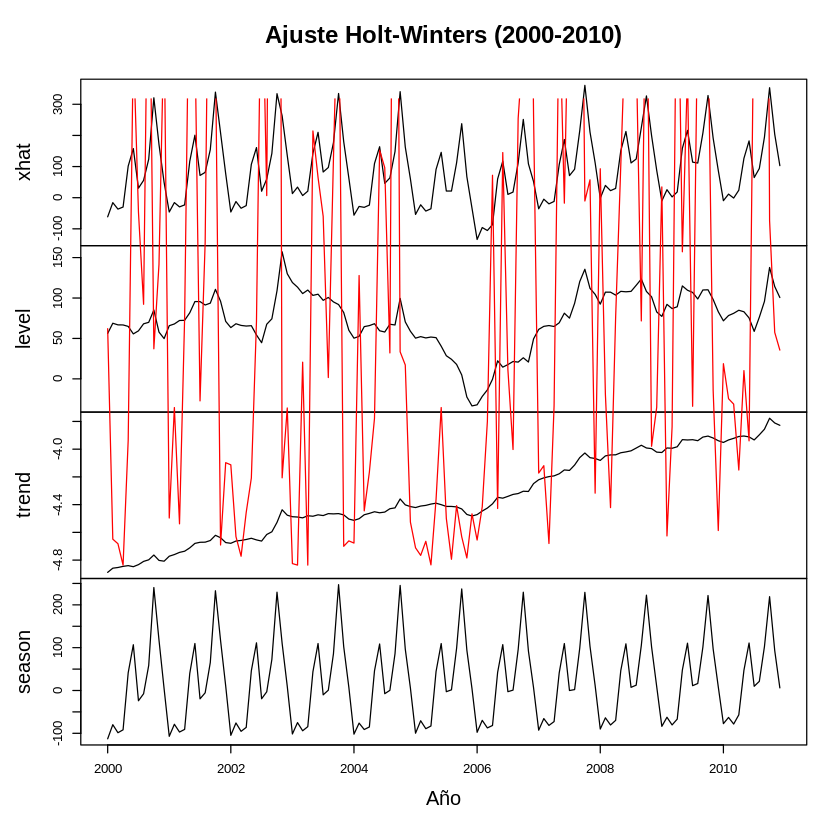

In [104]:
# Graficar los componentes y el ajuste para el periodo 2000-2010
plot(window(HW$fitted, start = c(2000, 1), end = c(2010, 12)),
     main = "Ajuste Holt-Winters (2000-2010)",
     ylab = "Lluvia Total Mensual",
     xlab = "Año")
lines(window(x, start = c(2000, 1), end = c(2010, 12)), col = "red")  # Añadir la serie original en rojo
legend("topright", legend = c("Ajuste", "Serie Original"), col = c("black", "red"), lty = 1)


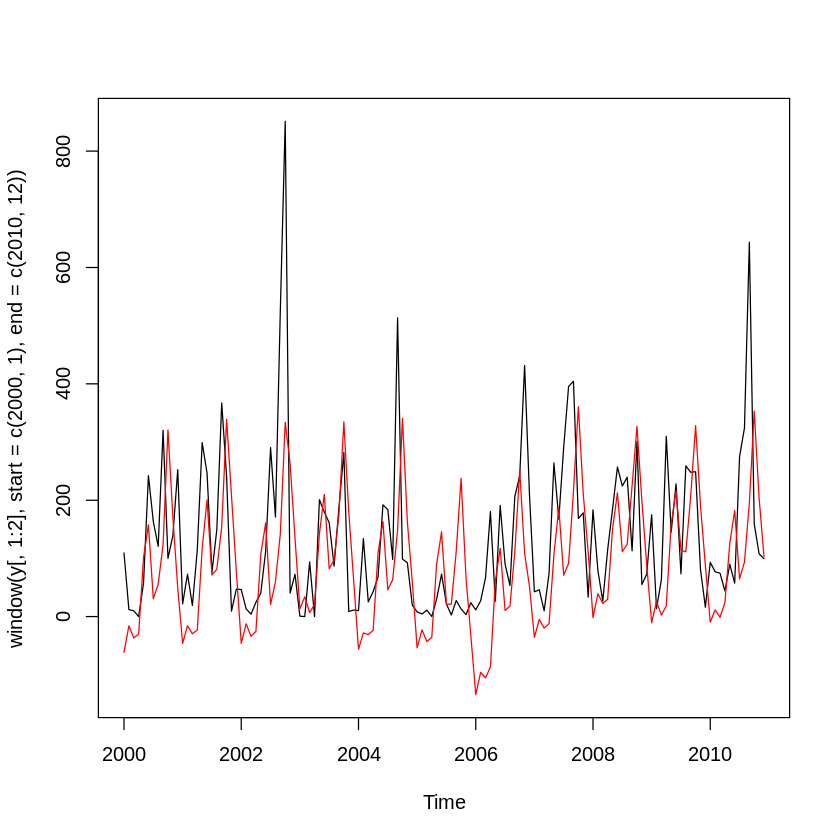

In [97]:
y <- cbind(x, HW$fitted[, 1])
y <- cbind(y, y[, 1] - y[, 2])
y <- na.omit(y)
plot(window(y[, 1:2], start = c(2000, 1), end = c(2010, 12)), plot.type = "single",
    col = c("black", "red"))